<a href="https://colab.research.google.com/github/yurikobyzev/yurikobyzev/blob/main/train_yolov8_instance_segmentation_on_irisglaucoma_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **12.02.2023** with version **YOLOv8.0.28**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.2/166.8 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
HOME='/content/drive/MyDrive/iris/'

In [6]:
%cd {HOME}

/content/drive/MyDrive/iris


In [7]:
# see load_label_png.py also.
import numpy as np
import PIL.Image


label_png = '/content/drive/MyDrive/iris/segmentation_dataset/labels_png/norm_10_1_left.png'
lbl = np.asarray(PIL.Image.open(label_png))
print(lbl.dtype)

np.unique(lbl)
lbl.shape


uint8


(1080, 1920, 3)

## CLI Basics 

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Custom Training

In [10]:
HOME

'/content/drive/MyDrive/iris/'

In [11]:
data = '/content/drive/MyDrive/iris/segmentation_dataset/data.yaml'

In [ ]:
best='yolov8s-seg.pt '

In [27]:
best='/content/drive/MyDrive/iris/runs/segment/train7/weights/best.pt'

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model={best} data={data} epochs=3 imgsz=640

/content/drive/MyDrive/iris
Ultralytics YOLOv8.0.28 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=/content/drive/MyDrive/iris/runs/segment/train7/weights/best.pt, data=/content/drive/MyDrive/iris/segmentation_dataset/data.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True

In [16]:
!ls {HOME}/runs/segment/train/

args.yaml  weights


In [ ]:
HOME='/content/drive/MyDrive/iris'

/content/drive/MyDrive/iris


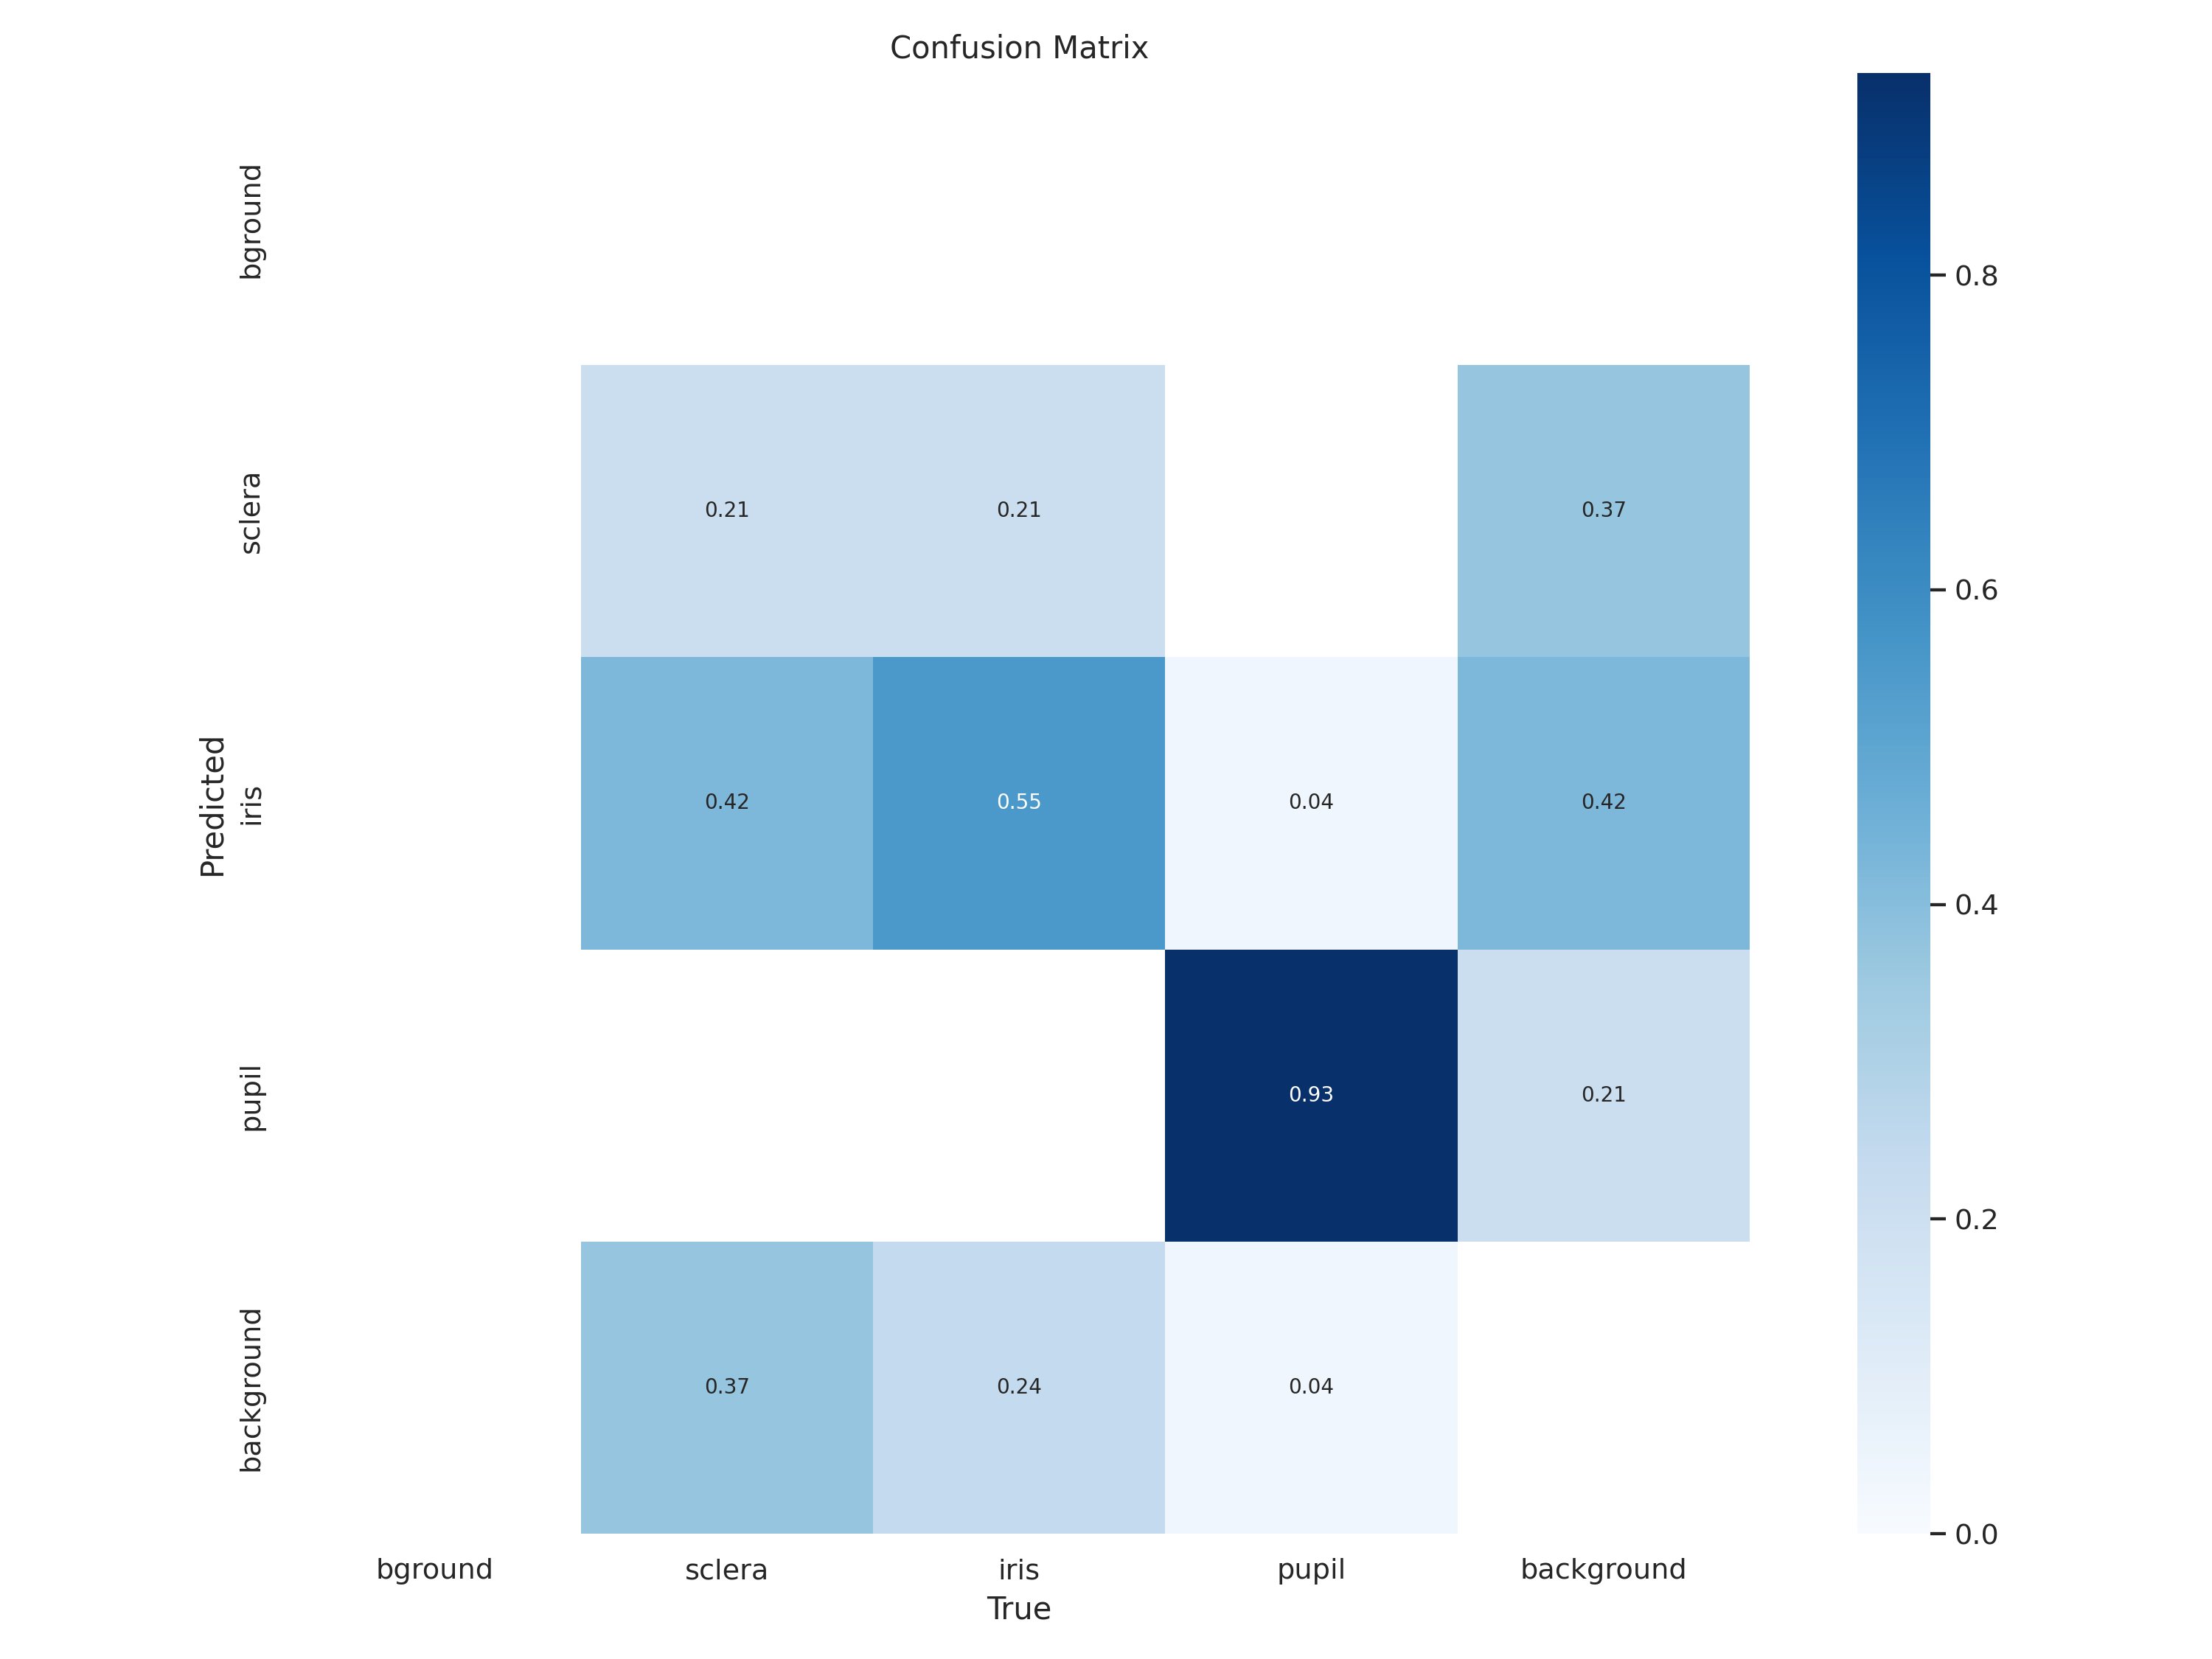

In [19]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train7/confusion_matrix.png', width=600)

/content/drive/MyDrive/iris


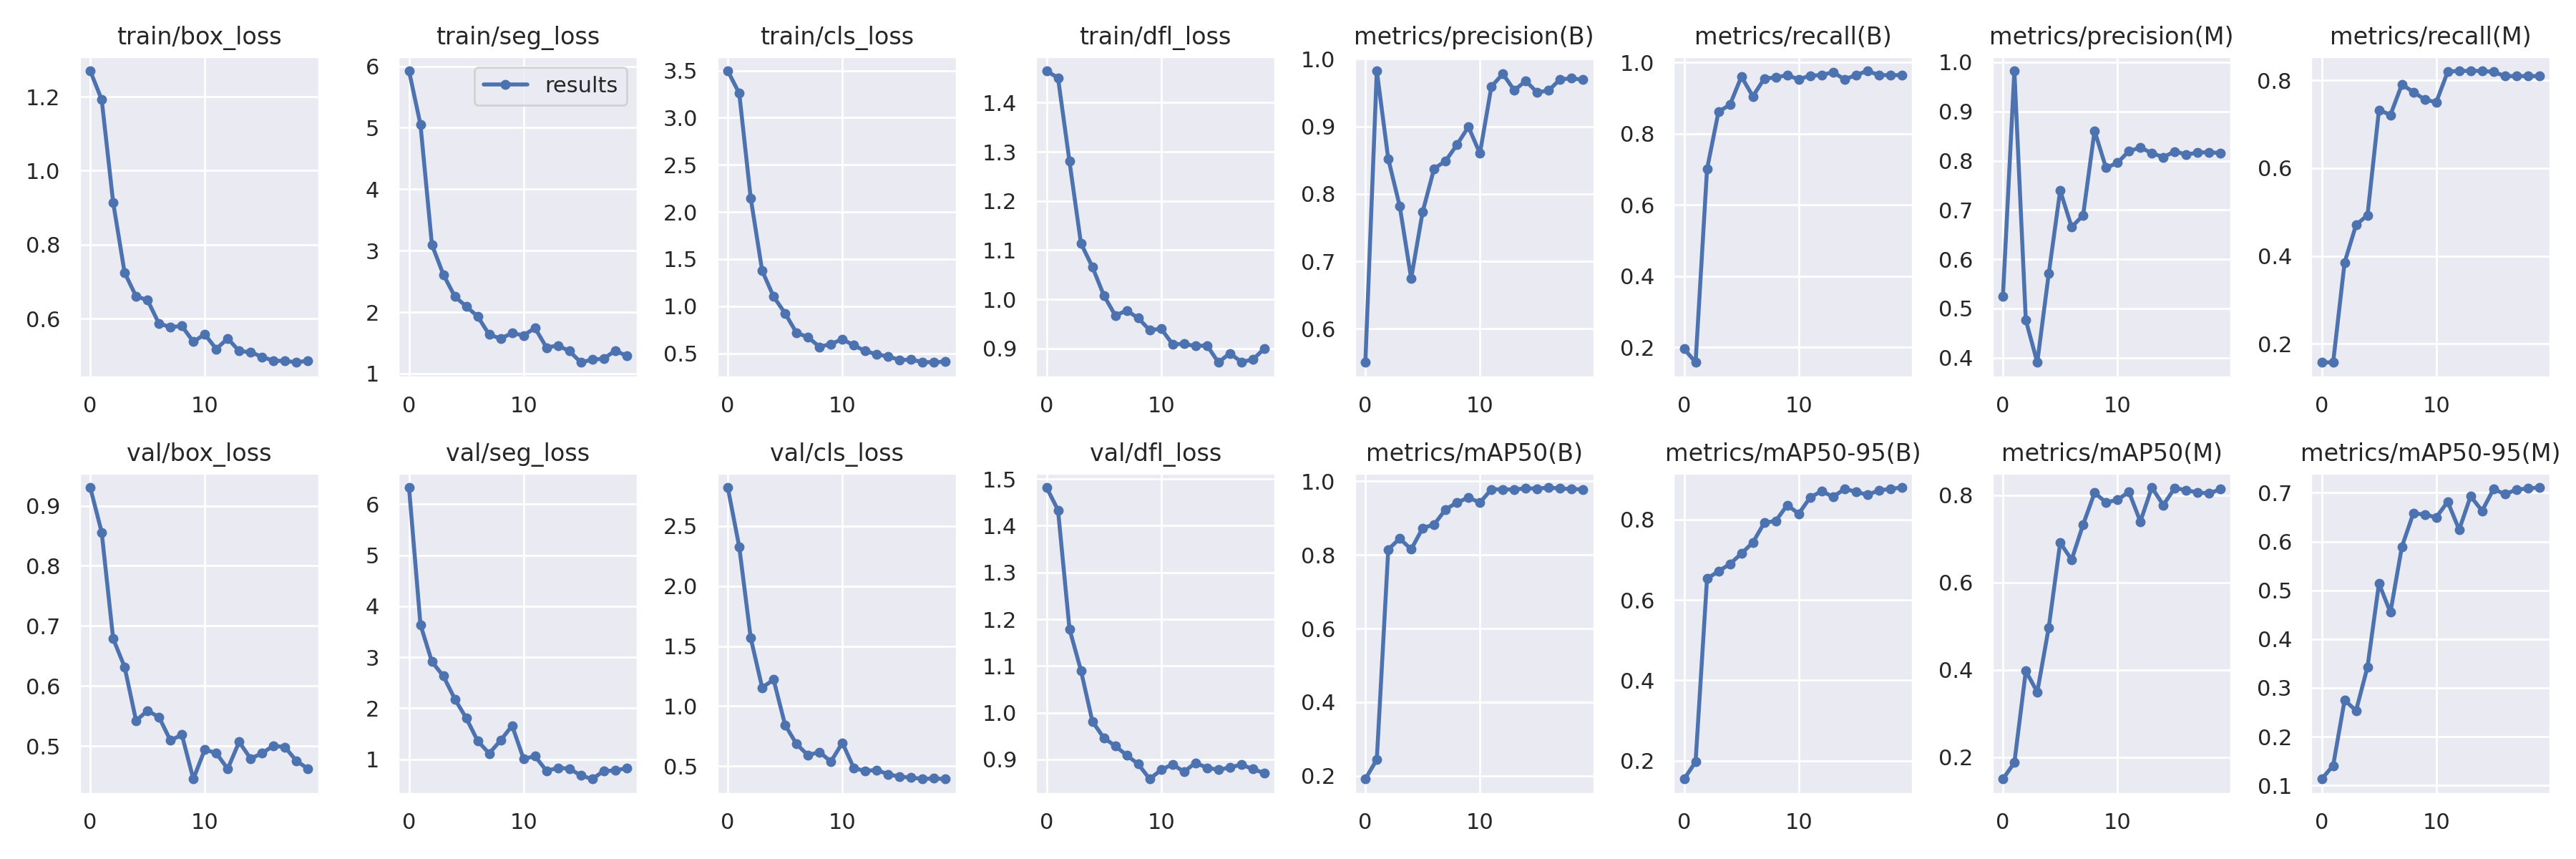

In [20]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train7/results.png', width=600)

/content/drive/MyDrive/iris


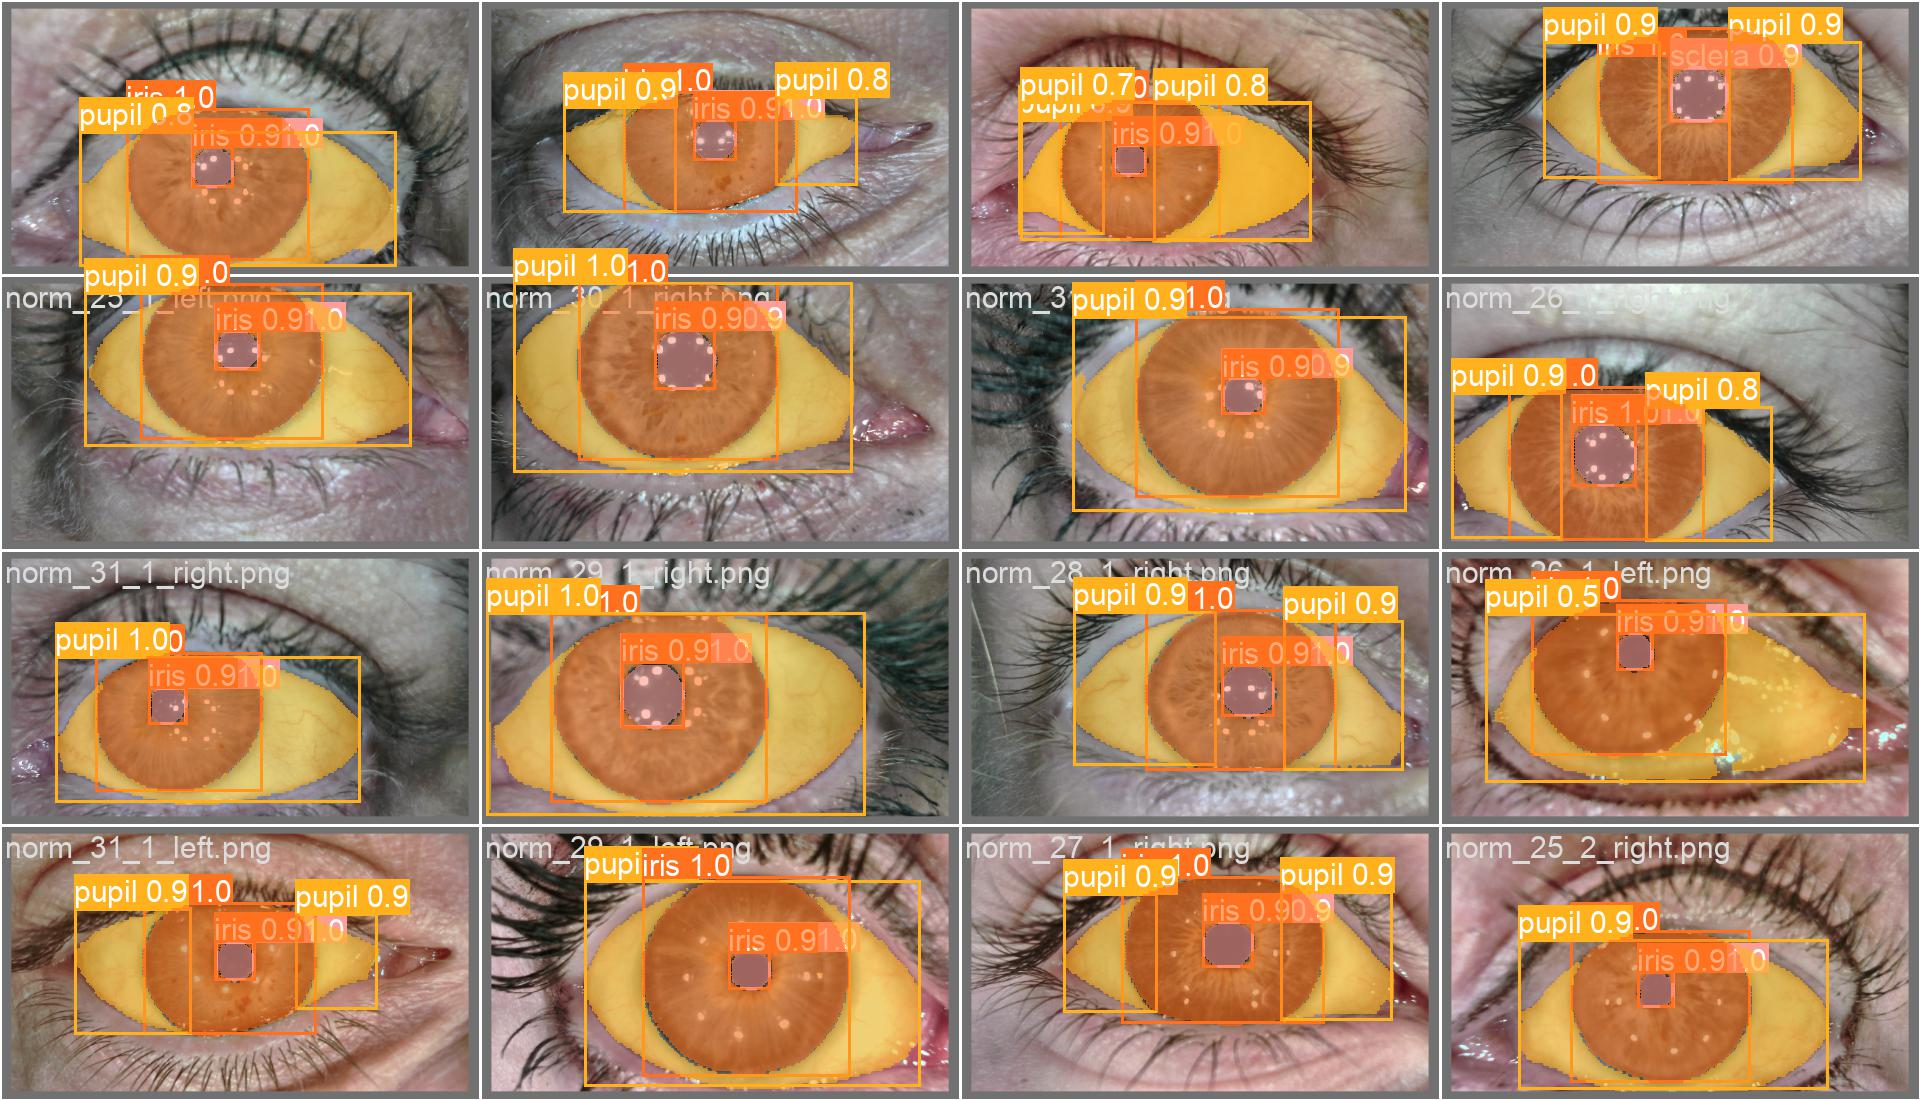

In [21]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train7/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [23]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train7/weights/best.pt data={data}


/content/drive/MyDrive/iris
2023-04-17 16:13:51.448123: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-17 16:13:52.321269: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11781148 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/drive/MyDrive/iris/segmentation_dataset/labels/val.cache... 19 images, 0 backgrounds, 0 corrupt: 100% 19/19 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 2/2 [00:03<00:00,  1.54s/it]
                   all         19      

## Inference with Custom Model

In [25]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train7/weights/best.pt conf=0.25 source='/content/drive/MyDrive/iris/AMF_Iris_Dataset/aadil' save=true

/content/drive/MyDrive/iris
2023-04-17 16:14:32.122859: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-17 16:14:33.212095: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11781148 parameters, 0 gradients, 42.4 GFLOPs

image 1/10 /content/drive/MyDrive/iris/AMF_Iris_Dataset/aadil/Iris_20220818_122818_Left.bmp: 480x640 1 sclera, 2 iriss, 2 pupils, 80.6ms
image 2/10 /content/drive/MyDrive/iris/AMF_Iris_Dataset/aadil/Iris_20220818_122818_Right.bmp: 480x640 1 sclera, 2 iriss, 16.7ms
image 3/10 /content/drive/MyDrive/iris/AMF_Iris_Dataset/aadil/Iris_20220818_122821_Left.b

<H1> BMP не поддерживается!

In [26]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.bmp')[:3]:
      #display(Image(filename=image_path, height=600))
      Image(filename=image_path, height=600)
      print("\n")

ValueError: ignored